Configure path envirorment

In [16]:
import sys
import os
sys.path.append(os.getcwd()[:-4])

Import Libraries

In [17]:
import numpy as np
from examples.numeric_function_otimizer import NumericFunctionOtimizer
from src.crossover.blend_crossover import BlendCrossover
from src.crossover.one_point_crossover import OnePointCrossover
from src.mutation.amplification_mutation import AmplificationMutation
from src.mutation.interval_mutation import IntervalMutation
from src.selection.roulette_selection import RouletteSelection

import matplotlib.pyplot as plt
plt.style.use('ggplot')

Defining Function to Otimize

In [18]:
def ackley_function(x):
    return - 20*np.exp(-0.2*np.sqrt(np.mean(np.square(x)))) \
           - np.exp(np.mean(np.cos(2*np.pi*x))) \
           + 20 + np.e

Visualizing the function

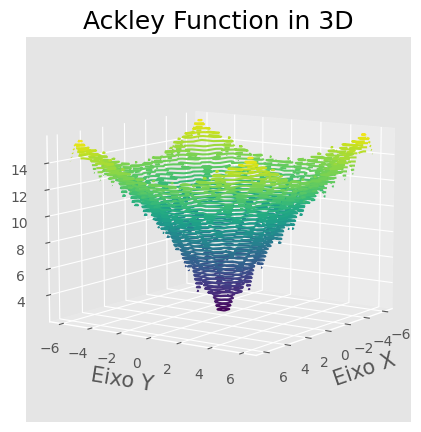

In [19]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = np.copy(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = ackley_function(np.array([X[i][j], Y[i][j]]))

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_title('Ackley Function in 3D', fontsize=18)
ax.set_xlabel('Eixo X', fontsize=15)
ax.set_ylabel('Eixo Y', fontsize=15)
ax.set_zlabel('Eixo Z', fontsize=15)
ax.view_init(10, 35)
plt.show()

Grid Search Process to find best params

In [20]:
params = {
    "n_individuals" : [20, 50, 100],
    "n_generations" : [25, 50, 100],
    "n_genes"       : [2],
    "otimizer"      : np.argmin,
    "mutation_rate" : [0.01, 0.05, 0.1],
    "selection"     : [RouletteSelection()],
    "crossover"     : [BlendCrossover(alpha=0.1, beta=0.1), OnePointCrossover()],
    "mutation"      : [IntervalMutation(lmin=-1, lmax=1), AmplificationMutation(alpha=0.01)],
}
kwargs = {
    "lmin": -1,
    "lmax": 1,
    "function": ackley_function
}

best_fitness, best_params = NumericFunctionOtimizer().grid_search(**params,**kwargs)
print('Best Fitness:', best_fitness)
print('Best Params:', best_params)

Best Fitness: 0.02748173032092156
Best Params: {'n_individuals': 100, 'n_genes': 2, 'n_generations': 100, 'otimizer': <function argmin at 0x7ff6c8316480>, 'mutation_rate': 0.1, 'selection': <src.selection.roulette_selection.RouletteSelection object at 0x7ff68539f610>, 'crossover': <src.crossover.blend_crossover.BlendCrossover object at 0x7ff68792d150>, 'mutation': <src.mutation.interval_mutation.IntervalMutation object at 0x7ff684025f10>}


Creating the genetic algorithm model with best params

In [23]:
model = NumericFunctionOtimizer(
    n_individuals = best_params['n_individuals'],
    n_generations = best_params['n_generations'],
    n_genes = best_params['n_genes'],
    otimizer = best_params['otimizer'],
    mutation_rate = best_params['mutation_rate'],
    ** kwargs
)

model.set_selection(best_params['selection'])
model.set_crossover(best_params['crossover'])
model.set_mutation(best_params['mutation'])


Running the Optimization for ten steps

In [44]:
steps = 10
fitness_evolution = []
for i in range(steps):
    best_individual = model.simulate()
    best_fitness += model.fitness([best_individual])[0]
    fitness_evolution.append([min(model.fitness(generation)) for generation in model.history_individuals])

mean_fitness = np.mean(np.array(fitness_evolution).T, axis = 1)
std_fitness = np.std(np.array(fitness_evolution).T, axis = 1)

Visualizing Mean Fitness and Standart Deviation of model

Best Fitness Mean:  0.030095597709909418


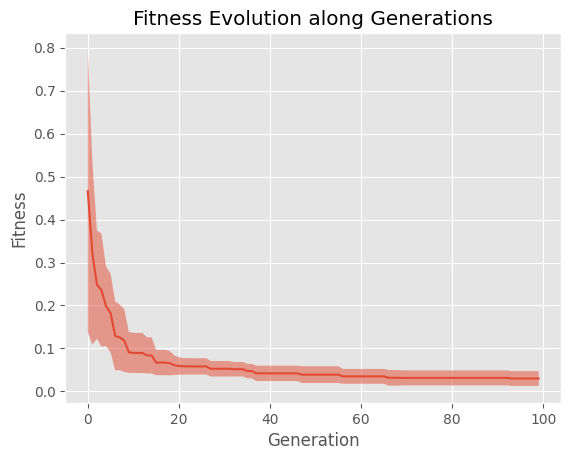

In [47]:
print('Best Fitness Mean: ', mean_fitness[-1])
x = np.arange(mean_fitness.shape[0])
plt.plot(x,mean_fitness)
plt.fill_between(x,mean_fitness-std_fitness, mean_fitness+std_fitness,alpha=0.5)
plt.title('Fitness Evolution along Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()